In [2]:
import gdown
import os

### Demostración sistema CBIR

Este notebook es una demostración de la utilización del sistema CBIR implementado. Para correr el notebook es necesario descargar el .csv con los histogramas correspondientes a cada método. Para esto se utiliza gdown. 

In [8]:
ROOT_DIR = os.path.dirname(os.path.dirname(os.path.abspath("__file__")))
ROOT_DIR

'/root/labint/LabInt'

In [ ]:
#se debe tener descargadas las imagenes
DATASET_PATH = 'path a imagenes'

In [ ]:
DATASET_ID = '1GIev1TxyifVMXZk7itgLha1LuiusrvLn'

In [ ]:
if not os.path.exists(DATASET_PATH + "final_histogram.csv"):
    print("No se encontró el dataset, se descargará")
    url = f'https://drive.google.com/uc?id={DATASET_ID}'
    output = DATASET_PATH + "final_histogram.csv"
    gdown.download(url, output, quiet=False)

#### Proveer el directorio al conjunto de imágenes de la base de datos. 

In [8]:
#PATH_TO_IMAGES = '/mnt/c/Users/pyanez/Desktop/pablo/universidad/LabInt/dataset/total'
PATH_TO_IMAGES = f'{ROOT_DIR}/LabInt/data/GPR1200/images'

#### Proveer la métrica. Las métricas disponibles son euclideana, coseno y manhattan.

In [9]:
MEASURE = 'cosine'

#### Importación de librerías y carga de la base de datos

In [10]:
import pandas as pd 
from src.SIFT.SIFT_gen_and_utils import SIFTFeatures  
import matplotlib.pyplot as plt 
from src.Metrics.metrics_utils import get_hist_from_str, plot_10, similarity_matrix, plot_histogram, similarity_metric, query_image, evaluate_query, precision_recall, consult_all, query_image_normal
from PIL import Image
import numpy as np
#df = pd.read_csv('/mnt/c/Users/pyanez/Desktop/pablo/universidad/LabInt/dataset/final_histograms.csv')
df = pd.read_csv(f'{ROOT_DIR}/LabInt/final_histograms.csv')
SIFT = SIFTFeatures("", "", run=False)
df["class"] = df["image_name"].apply(lambda x: SIFT.get_class(x))
df["features_histogram"] = df["features_histogram"].apply(lambda x: get_hist_from_str(x, separator=' '))
df["features_fusion"] = df["features_fusion"].apply(lambda x: get_hist_from_str(x, separator=','))
df["features_CNN"] = df["features_CNN"].apply(lambda x: get_hist_from_str(x, separator=','))

#### Proveer la imagen de consulta aquí

In [4]:
IMAGE_EXAMPLE = df["image_name"][0]

### Consultas

Se utiliza la función  `query_image_normal()`. Esta función recibe el dataframe de la base de datos cargado anteriormente. Además, recibe la imagen de consulta, la métrica a utilizar y el feature type a utilizar. La función devuelve el dataframe ordenado por el valor de similitud entregado por la métrica entregada.

Por ejemplo, si se quiere hacer una consulta a la base de datos utilizando los features generados por medio de CNN, se hace la siguiente consulta:

In [5]:
df_query_CNN = query_image_normal(df,IMAGE_EXAMPLE, measure=MEASURE, feature_type = "CNN")


Los resultados se pueden visualizar con la función `plot_10()`:

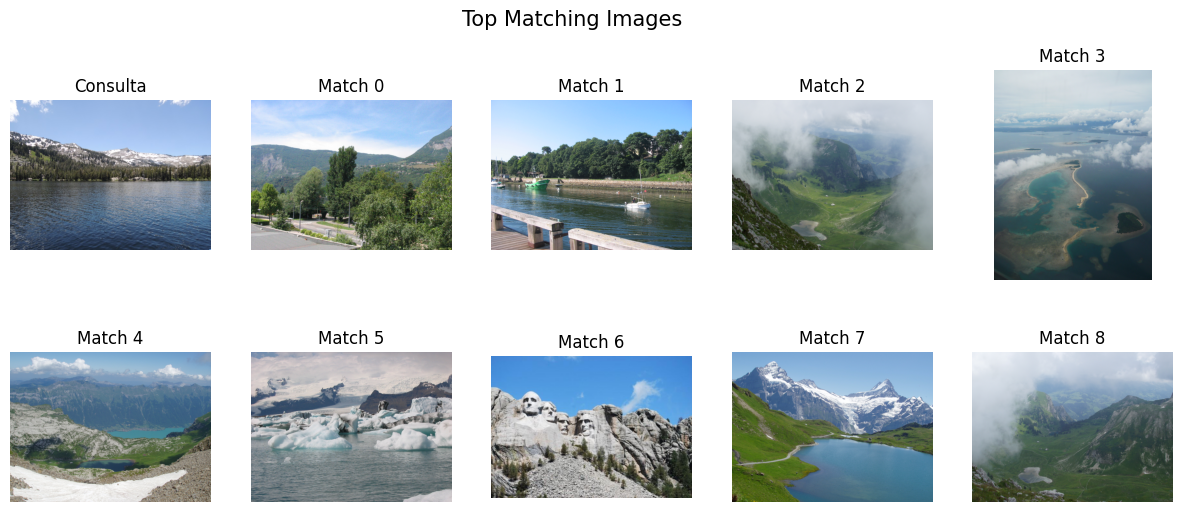

In [6]:
plot_10(df_query_CNN,PATH_TO_IMAGES)

Para comparar los resultados entre los distintos feature types, se puede utilizar la función `consult_all()`. Esta función recibe el dataframe de la base de datos, la medida, y el directorio a las imágenes de la base de datos. 

Esta función grafica las imágenes más similares según la métrica elegida, para los tres métodos. Además, entrega los tiempos de consulta para cada métrica.

Handcrafted query time:8.641
CNN query time:8.996
Fusion query time:8.982


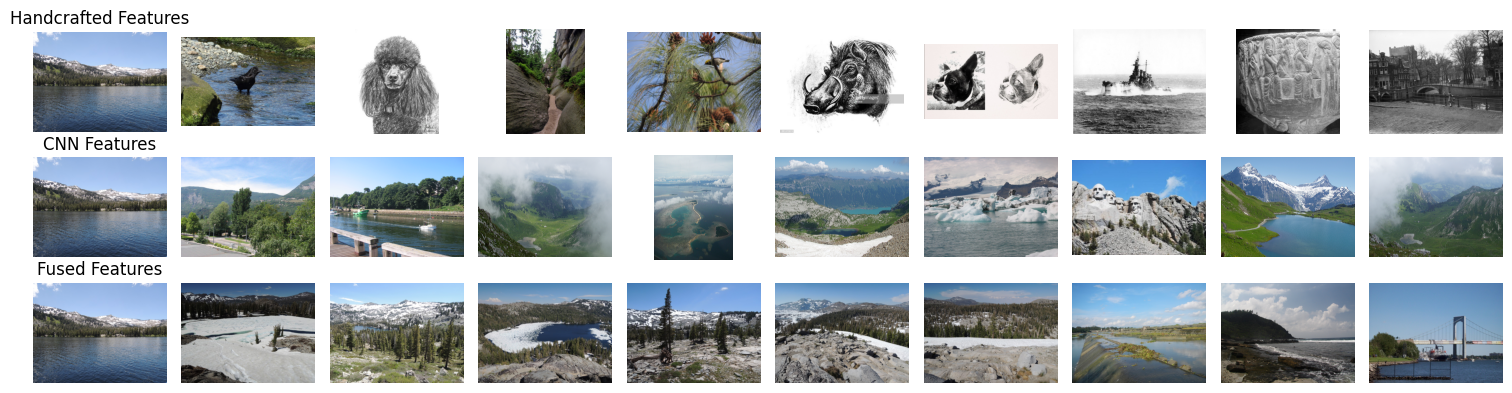

In [7]:
consult_all(df,IMAGE_EXAMPLE,MEASURE,PATH_TO_IMAGES)